This is the notebook for training a neural network from scratch with only numpy

In [247]:
import numpy as np
# np.set_printoptions(threshold=np.inf)
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import copy

Retrieve data

In [2]:
mnist = fetch_openml(name="mnist_784", version=1, as_frame=False)
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int64)


Data exploration here

In [3]:
print("X.shape:", X.shape)
print("y.shape:", y.shape)

print("X.dtype:", X.dtype)
print("y.dtype:", y.dtype)

print("Min pixel value:", X.min())
print("Max pixel value:", X.max())

print("Unique labels:", np.unique(y))

print("Any NaNs in X:", np.isnan(X).any())
print("Any NaNs in y:", np.isnan(y).any())


X.shape: (70000, 784)
y.shape: (70000,)
X.dtype: float32
y.dtype: int64
Min pixel value: 0.0
Max pixel value: 255.0
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Any NaNs in X: False
Any NaNs in y: False


Plotting values

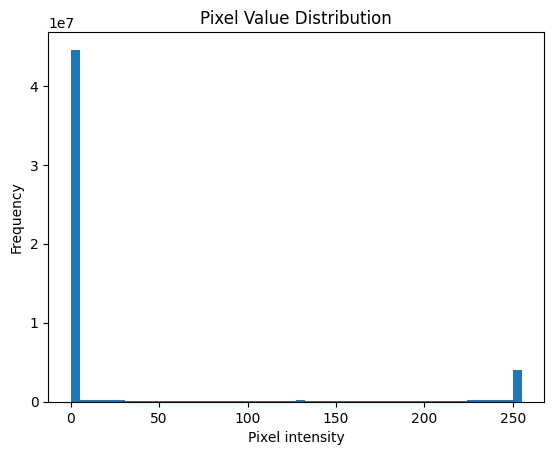

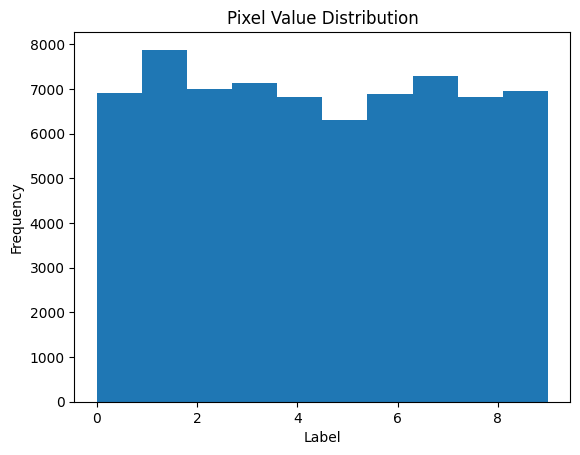

In [4]:
# Plotting pixel value distribution

plt.hist(X.flatten(), bins=50)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.show()

# Plotting label distribution
plt.hist(y, bins=10)
plt.title("Pixel Value Distribution")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()



Normalizing data

In [225]:
X = X / 255

train_end = int(X.shape[0] * 0.8)
cv_end = int(X.shape[0] * 0.9)

randomized_indices = np.random.permutation(X.shape[0])

train_indices = randomized_indices[0 : train_end]
cv_indices = randomized_indices[train_end : cv_end]
test_indices = randomized_indices[cv_end:]

X_train = X[train_indices]
y_train = y[train_indices]

X_cv = X[cv_indices]
y_cv = y[cv_indices]

X_test = X[test_indices]
y_test = y[test_indices]

print(X_train[np.random.choice(X_train.shape[0], size=10, replace=False)])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Weight Initialization (Using the He Initialization method)


In [227]:
def weightInit(*, n_input=784, n1=512, n2=256, n3=128, n_out=10, X_train=X_train, y_train=y_train):
    W1 = np.random.randn(n_input, n1) * np.sqrt(2.0 / n_input)
    b1 = np.zeros(n1)
    print("W1.shape=", W1.shape)
    print("b1.shape=", b1.shape)
    # print(W1[np.random.choice(W1.shape[0], size=10, replace=False)])

    W2 = np.random.randn(n1, n2) * np.sqrt(2.0 / n1)
    b2 = np.zeros(n2)
    print("W2.shape=", W2.shape)
    print("b2.shape=", b2.shape)

    W3 = np.random.randn(n2, n3) * np.sqrt(2.0 / n2)
    b3 = np.random.randn(n3)
    print("W3.shape=", W3.shape)
    print("b3.shape=", b3.shape)

    W4 = np.random.randn(n3, n_out) * np.sqrt(2.0 / n3)
    b4 = np.random.randn(n_out)
    print("W3.shape=", W3.shape)
    print("b3.shape=", b3.shape)

    # use smaller set at first to test, comment out when using full dataset
    idx = np.random.choice(X_train.shape[0], size=200, replace=False)
    X_train = X_train[idx]
    y_train = y_train[idx]

    return {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
        'W3': W3,
        'b3': b3,
        'W4': W4,
        'b4': b4
    }



In [243]:
n_input = 784
n1 = 512
n2 = 256
n3 = 128
n_out = 10

# Weights as a dictionary
weights = weightInit(n_input=n_input, n1=n1, n2=n2, n3=n3, n_out=n_out, X_train=X_train, y_train=y_train)
W1 = weights['W1']
b1 = weights['b1']
W2 = weights['W2']
b2 = weights['b2']
W3 = weights['W3']
b3 = weights['b3']
W4 = weights['W4']
b4 = weights['b4']


W1.shape= (784, 512)
b1.shape= (512,)
W2.shape= (512, 256)
b2.shape= (256,)
W3.shape= (256, 128)
b3.shape= (128,)
W3.shape= (256, 128)
b3.shape= (128,)


Now we'll begin programming the forward pass

First Hidden Layer (relu)

In [229]:
z_1 = X_train @ W1 + b1
a_1 = np.maximum(0, z_1)
print(a_1.shape)

(56000, 512)


Second Hidden Layer (relu)

In [234]:
z_2 = a_1 @ W2 + b2
a_2 = np.maximum(0, z_2)
print(a_2.shape)
# print(a_2[np.random.choice(a_2.shape[0], size=1, replace=False)])

(56000, 256)


Third Hidden Layer

In [235]:
z_3 = a_2 @ W3 + b3
a_3 = np.maximum(0, z_3)
print(a_3.shape)

(56000, 128)


The logits before the softmax output

In [236]:
z_4 = a_3 @ W4 + b4

Softmax activation function applied

(56000, 10)
[0.13128377 0.09975014 0.58818054 0.01025408 0.06229953 0.04632771
 0.04736766 0.01179882 0.00101539 0.00172237]
1.0
2
vs
Correct Image


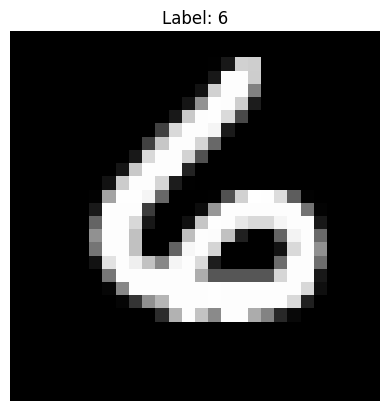

In [237]:
shifted = z_4 - np.max(z_4, axis=1, keepdims=True)
z_4_exp = np.exp(shifted)
p = z_4_exp / np.sum(z_4_exp, axis=1, keepdims=True)
print(p.shape)
print(p[0])
print(p[0].sum())
print(np.argmax(p[0]))
print("vs")
print("Correct Image")


img = X_train[0].reshape(28, 28)

plt.imshow(img, cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

Loss Function for Softmax

In [238]:
p = np.clip(p, 1e-12, 1.0)
loss = -np.mean(np.log(p[np.arange(y_train.shape[0]), y_train]))

print(loss)

3.360170785142378


Repeatable function for forward pass

In [266]:
def forwardPass(*, X_train=X_train, y_train=y_train, weights=weights, lmbda=0):

    W1 = weights['W1']
    b1 = weights['b1']
    W2 = weights['W2']
    b2 = weights['b2']
    W3 = weights['W3']
    b3 = weights['b3']
    W4 = weights['W4']
    b4 = weights['b4']

    # First Hidden Layer
    z_1 = X_train @ W1 + b1
    a_1 = np.maximum(0, z_1)

    # Second Hidden Layer
    z_2 = a_1 @ W2 + b2
    a_2 = np.maximum(0, z_2)

    # Third Hidden Layer
    z_3 = a_2 @ W3 + b3
    a_3 = np.maximum(0, z_3)

    # Logits before softmax
    z_4 = a_3 @ W4 + b4

    # Softmax activation applied
    shifted = z_4 - np.max(z_4, axis=1, keepdims=True)
    z_4_exp = np.exp(shifted)
    p = z_4_exp / np.sum(z_4_exp, axis=1, keepdims=True)

    # loss function for softmax
    p = np.clip(p, 1e-12, 1.0)
    loss = (
        -np.mean(np.log(p[np.arange(y_train.shape[0]), y_train])) 
            + (lmbda/(2 * X_train.shape[0])) * ((W1**2).sum() + (W2**2).sum() + (W3**2).sum() + (W4**2).sum())
        )
    return loss, {
        "a_1": a_1,
        "a_2": a_2,
        "a_3": a_3,
        "p": p,
        "z_1": z_1,
        "z_2": z_2,
        "z_3": z_3,
        "z_4": z_4
        }


Repeatable Function for backward prop

In [268]:
def backpropagation(*, cache=None, X_train=None, y_train=None, weights=None, lmbda=0):

    a_1 = cache["a_1"]
    a_2 = cache["a_2"]
    a_3 = cache["a_3"]
    p = cache["p"]
    z_1 = cache["z_1"]
    z_2 = cache["z_2"]
    z_3 = cache["z_3"]
    z_4 = cache["z_4"]

    W1 = weights['W1']
    b1 = weights['b1']
    W2 = weights['W2']
    b2 = weights['b2']
    W3 = weights['W3']
    b3 = weights['b3']
    W4 = weights['W4']
    b4 = weights['b4']

    y_1he = np.zeros((len(y_train), 10))
    y_1he[np.arange(len(y_train)), y_train] = 1

    dJ_dz4 = p - y_1he # Gradient of loss for each logit, shape = (200, 10)

    dJ_dw4 = (a_3.T @ dJ_dz4) / a_3.shape[0]# Gradients for output layer
    dJ_db4 = np.mean(dJ_dz4, axis=0)

    dJ_da3 = dJ_dz4 @ W4.T # Gradients for third hidden layer

    da3_dz3 = np.where(z_3 > 0, 1, 0)
    dJ_dz3 = da3_dz3 * dJ_da3


    dJ_dw3 = (a_2.T @ dJ_dz3) / a_2.shape[0]
    dJ_db3 = np.mean(dJ_dz3, axis=0)


    dJ_da2 = dJ_dz3 @ W3.T # Gradients for second hidden layer

    da2_dz2 = np.where(z_2 > 0, 1, 0)
    dJ_dz2 = da2_dz2 * dJ_da2

    dJ_dw2 = (a_1.T @ dJ_dz2) / a_1.shape[0]
    dJ_db2 = np.mean(dJ_dz2, axis=0)

    dJ_da1 = dJ_dz2 @ W2.T # Gradients for first hidden layer

    da1_dz1 = np.where(z_1 > 0, 1, 0)
    dJ_dz1 = da1_dz1 * dJ_da1

    dJ_dw1 = (X_train.T @ dJ_dz1) / X_train.shape[0]
    dJ_db1 = np.mean(dJ_dz1, axis=0)

    # L2 regularization
    dJ_dw4 += (lmbda / X_train.shape[0]) * W4
    dJ_dw3 += (lmbda / X_train.shape[0]) * W3
    dJ_dw2 += (lmbda / X_train.shape[0]) * W2
    dJ_dw1 += (lmbda / X_train.shape[0]) * W1

    return {"dJ_dw4": dJ_dw4, "dJ_db4": dJ_db4, "dJ_dw3": dJ_dw3, "dJ_db3": dJ_db3,
            "dJ_dw2": dJ_dw2, "dJ_db2": dJ_db2, "dJ_dw1": dJ_dw1, "dJ_db1": dJ_db1}


Update weights

In [269]:
def update(*, alpha = 0.01, cache = None, weights=None, grads=None):

    W1 = weights['W1']
    b1 = weights['b1']
    W2 = weights['W2']
    b2 = weights['b2']
    W3 = weights['W3']
    b3 = weights['b3']
    W4 = weights['W4']
    b4 = weights['b4']

    W4 -= alpha * grads["dJ_dw4"]
    b4 -= alpha * grads["dJ_db4"]

    W3 -= alpha * grads["dJ_dw3"]
    b3 -= alpha * grads["dJ_db3"]

    W2 -= alpha * grads["dJ_dw2"]
    b2 -= alpha * grads["dJ_db2"]

    W1 -= alpha * grads["dJ_dw1"]
    b1 -= alpha * grads["dJ_db1"]

    return {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2,
        'W3': W3,
        'b3': b3,
        'W4': W4,
        'b4': b4
    }
    

Training loop

In [270]:
# initialize weights
weights = weightInit(n_input=n_input, n1=n1, n2=n2, n3=n3, n_out=n_out, X_train=X_train, y_train=y_train)

W1.shape= (784, 512)
b1.shape= (512,)
W2.shape= (512, 256)
b2.shape= (256,)
W3.shape= (256, 128)
b3.shape= (128,)
W3.shape= (256, 128)
b3.shape= (128,)


In [ ]:
epochs = 2000
batch_size = 64
loss = float("inf")
epsilon = 0.0001

n_input = 784
n1 = 512
n2 = 256
n3 = 128
n_out = 10

# early stop logic
best_cv_loss = float("inf")
patience = 100
counter = 0
tol = 1e-6 # accounts for floating point noise

training_loss_history = []
cv_loss_history = []

i = 0
while i < 2000: # epochs
    randomized_indices = np.random.permutation(X_train.shape[0])
    
    for start_of_batch in range(0, X_train.shape[0], batch_size):
        batch_indices = randomized_indices[start_of_batch : start_of_batch + batch_size]
        X_batch = X_train[batch_indices]
        y_batch = y_train[batch_indices]
        loss, cache = forwardPass(X_train=X_batch, y_train=y_batch, weights=weights, lmbda=0)
        grads = backpropagation(cache=cache, X_train=X_batch, y_train=y_batch, weights=weights, lmbda=0)
        weights = update(alpha=0.001, cache = cache, weights=weights, grads=grads)
    cv_loss, cache = forwardPass(X_train=X_cv, y_train=y_cv, weights=weights)
    print("CV loss=", cv_loss, "(Epoch= ", i + 1, ")", sep="")
    train_loss, cache = forwardPass(X_train=X_train, y_train=y_train, weights=weights)
    print("train loss=", train_loss, "(Epoch= ", i + 1, ")", sep="")
    training_loss_history.append(train_loss)
    cv_loss_history.append(cv_loss)

    if cv_loss < best_cv_loss - tol:
        best_cv_loss = cv_loss
        best_weights = copy.deepcopy(weights)
        counter = 0
    else:
        counter += 1

    if counter >= patience:
        print("early stop")
        weights = best_weights
        break
    i += 1

plt.figure(figsize=(10, 6))
plt.plot(training_loss_history, label="Training Loss")
plt.plot(cv_loss_history, label="CV Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

CV loss=1.3504427625526594(Epoch= 1)
train loss=1.3430494735002165(Epoch= 1)
CV loss=0.8079563506698999(Epoch= 2)
train loss=0.8019445328539454(Epoch= 2)
CV loss=0.5916857296517306(Epoch= 3)
train loss=0.5873784536136601(Epoch= 3)
CV loss=0.4904477336254391(Epoch= 4)
train loss=0.4872418976452036(Epoch= 4)
CV loss=0.4334837020509727(Epoch= 5)
train loss=0.430540892498526(Epoch= 5)
CV loss=0.3962133203853904(Epoch= 6)
train loss=0.39324319818471004(Epoch= 6)
CV loss=0.36995502660512636(Epoch= 7)
train loss=0.36731867931497164(Epoch= 7)
CV loss=0.3499206970155987(Epoch= 8)
train loss=0.3472384900614383(Epoch= 8)
CV loss=0.33452820385327314(Epoch= 9)
train loss=0.3313469499560693(Epoch= 9)
CV loss=0.32143892640568567(Epoch= 10)
train loss=0.31818009525343316(Epoch= 10)
CV loss=0.3104458061294173(Epoch= 11)
train loss=0.30654514921422366(Epoch= 11)
CV loss=0.300831170077246(Epoch= 12)
train loss=0.2964646136566384(Epoch= 12)
CV loss=0.29331534408014326(Epoch= 13)
train loss=0.2877265822817

In [ ]:
def inference(X):

    # First Hidden Layer
    z_1 = X @ W1 + b1
    a_1 = np.maximum(0, z_1)

    # Second Hidden Layer
    z_2 = a_1 @ W2 + b2
    a_2 = np.maximum(0, z_2)

    # Third Hidden Layer
    z_3 = a_2 @ W3 + b3
    a_3 = np.maximum(0, z_3)

    # Logits before softmax
    z_4 = a_3 @ W4 + b4

    # Softmax activation applied
    shifted = z_4 - np.max(z_4, axis=1, keepdims=True)
    z_4_exp = np.exp(shifted)
    p = z_4_exp / np.sum(z_4_exp, axis=1, keepdims=True)

    return np.argmax(p, axis=1)

train_accuracy = np.mean(inference(X_train) == y_train)
print("Training accuracy:", train_accuracy*100, "%")

cv_accuracy = np.mean(inference(X_cv) == y_cv)
print("CV accuracy:", cv_accuracy*100, "%")

gap = cv_loss - train_loss
gap_percentage = (gap / train_loss) * 100
print("relative gap between CV and Train loss:", gap_percentage, "%")
print()

print("Training error rate is approximately", 100 - train_accuracy*100, "%")
print("CV error rate is approximately", 100 - cv_accuracy*100, "%")
print("Bayes/human error rate for mnist datset is approximately 1%")


Training accuracy: 99.99464285714285 %
CV accuracy: 97.65714285714286 %
relative gap between CV and Train loss: 335.56533272093526 %

Training error rate is approximately 0.005357142857150166 %
CV error rate is approximately 2.3428571428571416 %
Bayes/human error rate is approximately 1%


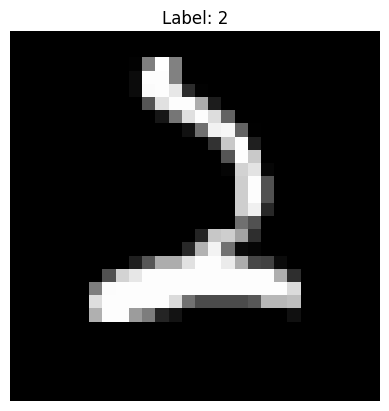

Predicted Label: 2
Index = 115


In [224]:
idx = np.random.choice(X_train.shape[0])

img = X_train[idx].reshape(28, 28)

plt.imshow(img, cmap="gray")
plt.title(f"Label: {y_train[idx]}")
plt.axis("off")
plt.show()

print("Predicted Label:", inference(X_train[0:1])[idx])
print("Index =", idx)